# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane has the most mice tested with over 200
- Capomulin and Ramicane are better treatments than Infubinol and Ceftamin
- The average tumor volume of mice being treated by Capomulin decreased by almost 10% after 45 days
- There is a strong indication that weight and average tumor size are correlated. The Pearson correlation coefficient is 0.84.

 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (I left merged so the timepoint is in the second column)
mouse_data = pd.merge(study_results, mouse_metadata, how = 'left')

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Checking the number of mice.
# Could also use .value_counts() as it counts the amount of times each Mouse ID comes up
number_of_mice = len(mouse_data['Mouse ID'].unique())
number_of_mice


249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
############################################################################################################
# There are duplicated Timepoints for each a certain Mouse ID... see graph where there are two 0s, two 5s etc.
# To find duplicated, use .duplicated(subset=[specific column(s)]). This returns Series of Boolean
# the additional 'Mouse ID' is used to print out ONLY the Mouse ID column (reminder that .loc[rows, columns])
############################################################################################################
dupe_mice = mouse_data.loc[mouse_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupe_mice

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df = mouse_data.loc[mouse_data['Mouse ID'] == 'g989', :]
dupe_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
############################################################################################################
# return all of mouse_data from the .isin() method
# .isin() returns boolean to check if 1 df is in another. Sticking a Boolean into a dataframe in [] 
# returns all those that are True
# this works because the method searches mouse_data and matches it with dupe_mice. However, I set the condition that
# I want to return all values that are == False (so those that ARE in both), thus returning the rest of the dataframe
# that are not duplicates
############################################################################################################
clean_df = mouse_data[mouse_data['Mouse ID'].isin(dupe_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = len(clean_df['Mouse ID'].value_counts())
clean_number_mice

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# putting .mean()[column] gives the mean of that specific column

regimen_mean = clean_df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']
regimen_median = clean_df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']
regimen_var = clean_df.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']
regimen_std = clean_df.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']
regimen_sem = clean_df.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                          'Median Tumor Volume': regimen_median,
                          'Tumor Volume Variance': regimen_var,
                          'Tumor Volume Std. Dev.': regimen_std,
                          'Tumor Volume Std. Err.': regimen_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# adding an extra [] creates a 'title' for the column, a column labeled Tumor volume with multiple subcolumns
# this is a way to "cheat" to create a column with a title whereas omitting the second [] outputs it as a single dataframe column
drug_agg = clean_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

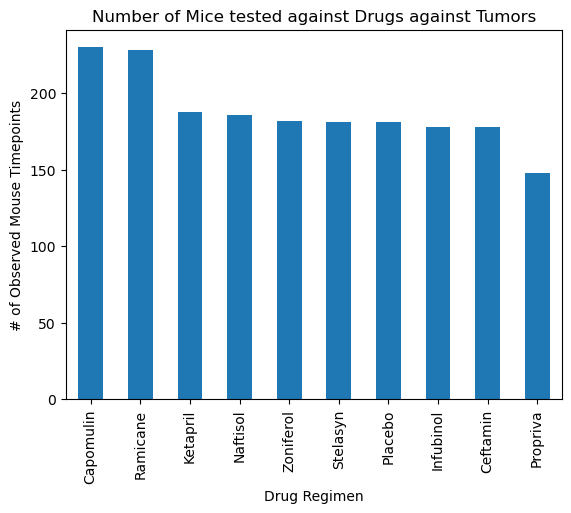

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df['Drug Regimen'].value_counts()

# I can just generate a graph by taking the dataframe of counts and drugs
mice_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Mice tested against Drugs against Tumors')
plt.show()


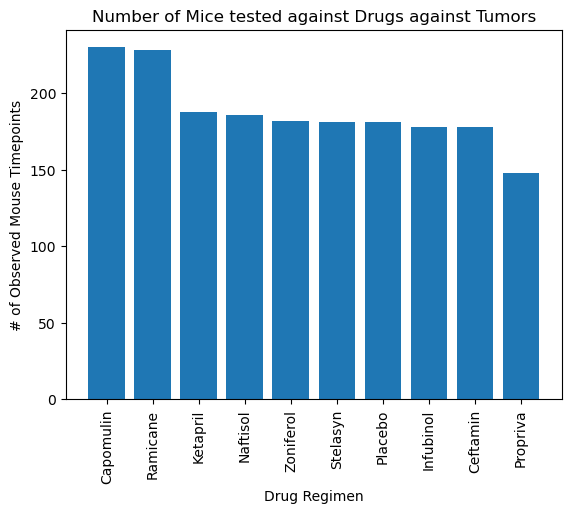

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# .index gives the indices and .values sets into an array thats callable
drug_axis = mice_count.index.values
count_axis = mice_count.values

plt.bar(drug_axis, count_axis, align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 'vertical')
plt.title('Number of Mice tested against Drugs against Tumors')
plt.show()



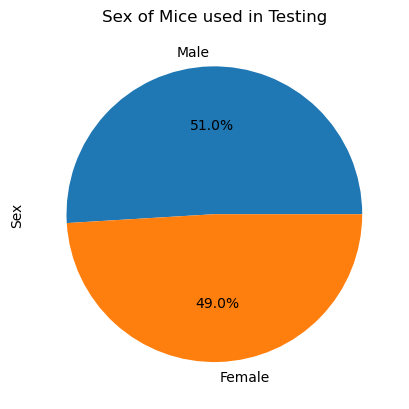

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df['Sex'].value_counts()

# first % means a value should be substituted in
# 1.1f means 1 floating point
# The double percent sign %% is an escape sequence that represents a literal percentage symbol %
mice_sex.plot.pie(autopct = '%1.1f%%') 
plt.title('Sex of Mice used in Testing')
plt.show()

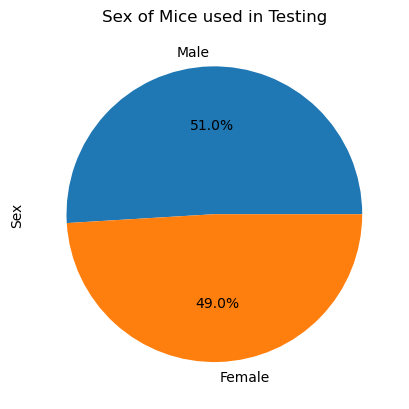

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = clean_df['Sex'].value_counts()
labels = mice_sex.index.values # again I just converted this to an array instead of typing out as a list

plt.pie(mice_sex, labels = labels, autopct = '%1.1f%%') 
plt.title('Sex of Mice used in Testing')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# this does not ensure max timepoint index = max tumor volume (or any other column), the next part checks if they are by merging
max_timepoint = clean_df.groupby(['Mouse ID']).max().reset_index()
max_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# this is to check if max timepoint index = max tumor volume
merged_data = max_timepoint[['Mouse ID', 'Timepoint']].merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_data

############################################################################################################
# alternatively, we can just use
# max_timepoint2 = clean_df.groupby(['Mouse ID']).max()['Timepoint'].reset_index()
# merged_data2 = pd.merge(clean_df, max_timepoint, on = ['Mouse ID', 'Timepoint'], how = 'right')
# merged_data2
############################################################################################################

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [467]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Used list comprehension to create a list of empty lists which will be filled with regimen data
drug_data = [[] for _ in regimen_list]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, drug in enumerate(regimen_list):

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add to subsets
    drug_data[index].append(regimen_data.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        
    outlier_points = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outlier_points} mm3")

# save regimen data for each treatment
capomulin = drug_data[0][0]
ramicane = drug_data[1][0]
infubinol = drug_data[2][0]
ceftamin  = drug_data[3][0]



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) mm3
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) mm3
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 mm3
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) mm3


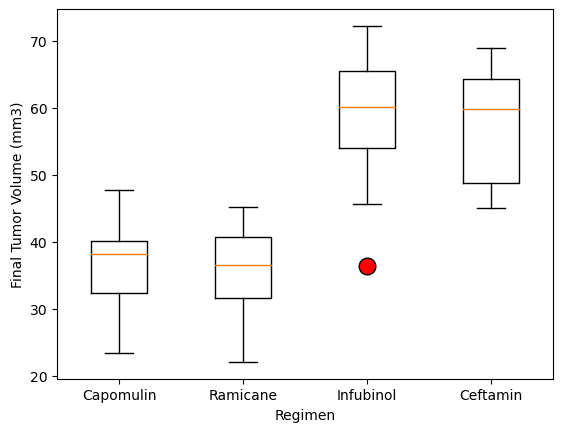

In [456]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=12)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = regimen_list, flierprops= red_dot)
plt.xlabel('Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

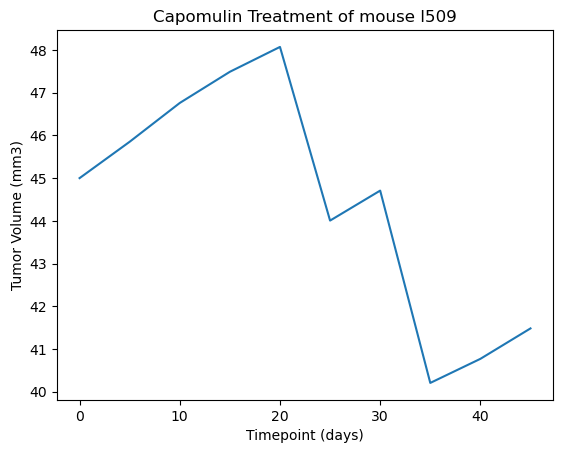

In [457]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == "Capomulin"]
mouse_l509_df = capomulin_df[capomulin_df['Mouse ID'] == 'l509']
mouse_l509_df
l509_timepoint = mouse_l509_df['Timepoint']
l509_tumor_vol = mouse_l509_df['Tumor Volume (mm3)']

plt.plot(l509_timepoint, l509_tumor_vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of mouse l509')
plt.show()

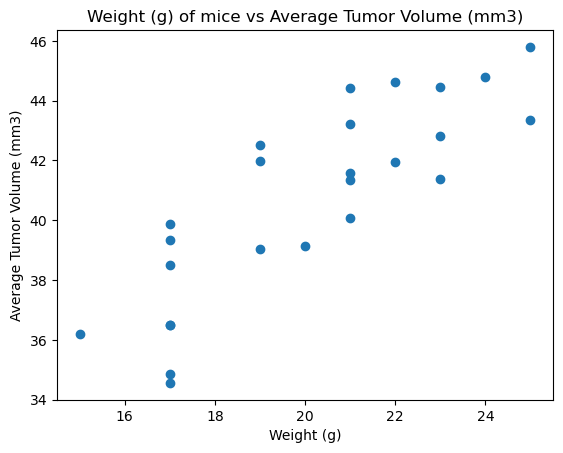

In [458]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_df = capomulin_df.groupby('Mouse ID').mean(numeric_only=True)

weight = capomulin_mice_df['Weight (g)']
avg_tumor_vol = capomulin_mice_df['Tumor Volume (mm3)']

plt.scatter(weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) of mice vs Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


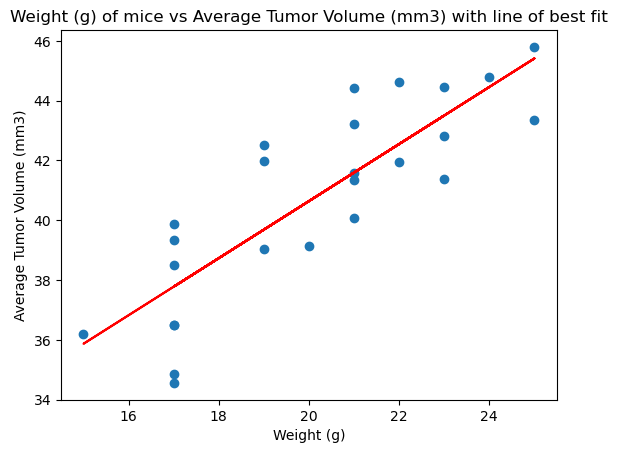

In [459]:
# Calculate the correlation coefficient and a linear regression model 
corr = st.pearsonr(weight, avg_tumor_vol)
print(f'The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}')

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight*slope + intercept
plt.scatter(weight, avg_tumor_vol)
plt.plot(weight, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) of mice vs Average Tumor Volume (mm3) with line of best fit')
plt.show()